In [1]:
import numpy as np
import pandas as pd

### Agregación de datos por categoría

In [2]:
gender=["Male","Female"]
income=["Poor","Middle Class","Rich"]

In [3]:
n=500 #tamaño dataset 500 filas

gender_data=[]
income_data=[]

#genera 500 datos aleatorios de género
for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))


In [4]:
gender_data[1:10]  #es una lista no se puede aplicar el head

['Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Male']

In [5]:
income_data[1:10]

['Middle Class',
 'Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Middle Class',
 'Middle Class',
 'Poor',
 'Rich']

In [4]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height=160+30*np.random.randn(n) # media 160 + dispersion 30
weight=65+25*np.random.randn(n) #todas son distribuciones normales
age=30+12*np.random.randn(n)
income=18000+3500*np.random.rand(n)

In [5]:
#creación del dataFrame a partir de un diccionario

data =pd.DataFrame(
    {
        "Gender": gender_data,
        "Economic Status": income_data,
        "Height": height,
        "Weight": weight,
        "Age": age,
        "Income": income    
    }
)

In [10]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Poor,159.045157,70.083749,9.740519,19332.122482
1,Female,Middle Class,123.547696,74.236608,45.005197,20127.992991
2,Male,Middle Class,117.759274,18.771338,1.723925,19701.187544
3,Male,Rich,183.872566,91.174303,33.938731,20194.600148
4,Female,Rich,153.906730,56.113915,39.385093,19241.337610


### Agrupación de datos

In [6]:
grouped_gender=data.groupby("Gender") #filtro ordenador por

In [12]:
grouped_gender.groups # devuelve datos agrupados

{'Female': Int64Index([  1,   4,   6,  10,  11,  15,  16,  21,  23,  24,
             ...
             473, 474, 476, 479, 481, 482, 486, 493, 494, 495],
            dtype='int64', length=249),
 'Male': Int64Index([  0,   2,   3,   5,   7,   8,   9,  12,  13,  14,
             ...
             487, 488, 489, 490, 491, 492, 496, 497, 498, 499],
            dtype='int64', length=251)}

In [14]:
#iteración o recorrido por cada una de las agrupaciones posibles
for names, groups in grouped_gender: #por cada nombre y grupo
    print(names)
    print(groups)

Female
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  123.547696  74.236608  45.005197  20127.992991
4    Female            Rich  153.906730  56.113915  39.385093  19241.337610
6    Female    Middle Class  169.807855  86.893538  21.901999  20711.116815
10   Female    Middle Class  209.561507  80.951281  10.869467  18124.977048
11   Female            Rich  132.455751  60.012530  18.705626  21283.858470
..      ...             ...         ...        ...        ...           ...
482  Female    Middle Class  125.617658  42.174476  22.650477  20851.809846
486  Female            Poor  132.991760  86.116245  46.069329  21197.188896
493  Female            Poor  125.360008  59.144800  24.271054  20329.650573
494  Female    Middle Class  176.638646  62.917631  38.145576  19713.042256
495  Female    Middle Class  195.450217  54.587198  28.096328  20338.896082

[249 rows x 6 columns]
Male
    Gender Economic Status      Height      Weight  

In [16]:
grouped_gender.get_group("Female") #filtra por grupo, agrupación por female

,Gender,Economic Status,Height,Weight,Age,Income
1,Female,Middle Class,123.547696,74.236608,45.005197,20127.992991
4,Female,Rich,153.906730,56.113915,39.385093,19241.337610
6,Female,Middle Class,169.807855,86.893538,21.901999,20711.116815
10,Female,Middle Class,209.561507,80.951281,10.869467,18124.977048
11,Female,Rich,132.455751,60.012530,18.705626,21283.858470
...,...,...,...,...,...,...
482,Female,Middle Class,125.617658,42.174476,22.650477,20851.809846
486,Female,Poor,132.991760,86.116245,46.069329,21197.188896
493,Female,Poor,125.360008,59.144800,24.271054,20329.650573
494,Female,Middle Class,176.638646,62.917631,38.145576,19713.042256


In [7]:
#agrupación por genero y estado economico, filtra 2 categorías
double_group=data.groupby(["Gender","Economic Status"])

In [18]:
len(double_group) #pide la longitud de la variable

6

In [19]:
for names, groups in double_group:  #recorriedo la variable
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height     Weight        Age        Income
1    Female    Middle Class  123.547696  74.236608  45.005197  20127.992991
6    Female    Middle Class  169.807855  86.893538  21.901999  20711.116815
10   Female    Middle Class  209.561507  80.951281  10.869467  18124.977048
15   Female    Middle Class  205.827132  -2.075028  29.460159  20148.592347
16   Female    Middle Class  155.827272  76.660846  22.934351  19199.026380
..      ...             ...         ...        ...        ...           ...
473  Female    Middle Class  204.723878  61.166559  20.731878  21092.028244
479  Female    Middle Class  166.148802  79.857907  28.063927  20199.213752
482  Female    Middle Class  125.617658  42.174476  22.650477  20851.809846
494  Female    Middle Class  176.638646  62.917631  38.145576  19713.042256
495  Female    Middle Class  195.450217  54.587198  28.096328  20338.896082

[80 rows x 6 columns]
('Female', 'Poor')
     Gender Economi

### Operaciones sobre datos agrupados

In [8]:
double_group.sum()   #suma los valores para cada una de las categorías de genero y estado social

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12813.335173  5451.003658  2347.354294  1.597666e+06
       Poor             13757.568560  5933.215721  2750.437638  1.693109e+06
       Rich             14201.242348  5703.396884  2388.255758  1.712763e+06
Male   Middle Class     10981.824312  4526.964238  1975.660165  1.351910e+06
       Poor             13884.083649  5669.104792  2403.489283  1.714913e+06
       Rich             14637.147538  6111.008058  2731.288890  1.811217e+06

In [9]:
double_group.mean() #la media para cada categoria de datos agrupados

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     160.166690  68.137546  29.341929  19970.828661
       Poor             159.971727  68.990880  31.981833  19687.313601
       Rich             163.232671  65.556286  27.451216  19686.926165
Male   Middle Class     161.497416  66.573003  29.053826  19881.033478
       Poor             159.587168  65.162124  27.626314  19711.642920
       Rich             159.099430  66.424001  29.687923  19687.144307

In [10]:
double_group.size()  #tamaño, devuelve el numero de elementos

Gender  Economic Status
Female  Middle Class       80
        Poor               86
        Rich               87
Male    Middle Class       68
        Poor               87
        Rich               92
dtype: int64

In [11]:
double_group.describe() #obtiene los estadísticos básicos

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      80.0  160.166690  23.940451  111.110019  144.376065   
       Poor              86.0  159.971727  28.962729   82.716344  139.470072   
       Rich              87.0  163.232671  30.282488   62.060941  147.199911   
Male   Middle Class      68.0  161.497416  31.305936   96.066194  140.620076   
       Poor              87.0  159.587168  30.154197   81.266726  140.926576   
       Rich              92.0  159.099430  29.314588   92.585836  142.528131   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     160.761138  174.175811  247.667086   80.0  68.137546   
       Poor             162.380747  180.492896  232.377313   86.0  68.990880   
       Rich             161.924676  182.097537  270.591608   87.0  65.556286   
Male   Middle Class     163.745807  183.580602  232.722587   68.0  66.573003   
       Poor             161.061388  180.731467  236.890234   87.0  65.162124   
       Rich             159.291061  181.208734  223.105930   92.0  66.424001   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  37.865687  53.392236   80.0  19970.828661   
       Poor             ...  40.492135  63.564833   86.0  19687.313601   
       Rich             ...  35.863807  57.973358   87.0  19686.926165   
Male   Middle Class     ...  36.208358  48.744864   68.0  19881.033478   
       Poor             ...  35.310968  54.791111   87.0  19711.642920   
       Rich             ...  36.953559  74.347004   92.0  19687.144307   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      982.796768  18005.803592  19157.072743  20042.880041   
       Poor              988.530653  18011.211506  18801.109388  19605.718086   
       Rich             1026.737777  18018.059233  18741.616395  19706.219315   
Male   Middle Class      955.154060  18077.724672  19158.934068  19895.899562   
       Poor              961.966543  18080.091022  18911.285301  19616.262939   
       Rich             1017.387724  18004.024294  18859.103273  19546.471332   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20765.604515  21438.173603  
       Poor             20546.156146  21453.198952  
       Rich             20480.884015  21432.811099  
Male   Middle Class     20601.029938  21486.844622  
       Poor             20538.815593  21466.219400  
       Rich             20613.820797  21494.393252  

[6 rows x 32 columns]

In [13]:
grouped_income=double_group["Income"] #realiza un filtro

In [14]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      80.0  19970.828661   982.796768  18005.803592   
       Poor              86.0  19687.313601   988.530653  18011.211506   
       Rich              87.0  19686.926165  1026.737777  18018.059233   
Male   Middle Class      68.0  19881.033478   955.154060  18077.724672   
       Poor              87.0  19711.642920   961.966543  18080.091022   
       Rich              92.0  19687.144307  1017.387724  18004.024294   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19157.072743  20042.880041  20765.604515  21438.173603  
       Poor             18801.109388  19605.718086  20546.156146  21453.198952  
       Rich             18741.616395  19706.219315  20480.884015  21432.811099  
Male   Middle Class     19158.934068  19895.899562  20601.029938  21486.844622  
       Poor             18911.285301  19616.262939  20538.815593  21466.219400  
       Rich             18859.103273  19546.471332  20613.820797  21494.393252

In [18]:
#filtra y Agrega calculos u otros 
double_group.aggregate(  
    {
       "Income":np.sum,
        "Age":np.mean,
        "Height":np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.597666e+06  29.341929  23.940451
       Poor             1.693109e+06  31.981833  28.962729
       Rich             1.712763e+06  27.451216  30.282488
Male   Middle Class     1.351910e+06  29.053826  31.305936
       Poor             1.714913e+06  27.626314  30.154197
       Rich             1.811217e+06  29.687923  29.314588

In [19]:
double_group.aggregate(
    {
        "Age":np.mean,
        "Height":lambda h:(np.mean(h))/np.std(h) #obtiene la tipificación, divide el promedio en desviación estandar
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.341929  6.732422
       Poor             31.981833  5.555760
       Rich             27.451216  5.421581
Male   Middle Class     29.053826  5.197039
       Poor             27.626314  5.323051
       Rich             29.687923  5.457051

In [20]:
double_group.aggregate([np.sum, np.mean, np.std]) #se aplican las tres funciones a cada una de las variables

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12813.335173  160.166690  23.940451  5451.003658   
       Poor             13757.568560  159.971727  28.962729  5933.215721   
       Rich             14201.242348  163.232671  30.282488  5703.396884   
Male   Middle Class     10981.824312  161.497416  31.305936  4526.964238   
       Poor             13884.083649  159.587168  30.154197  5669.104792   
       Rich             14637.147538  159.099430  29.314588  6111.008058   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     68.137546  24.607329  2347.354294  29.341929   
       Poor             68.990880  23.685234  2750.437638  31.981833   
       Rich             65.556286  27.334492  2388.255758  27.451216   
Male   Middle Class     66.573003  27.205853  1975.660165  29.053826   
       Poor             65.162124  24.613315  2403.489283  27.626314   
       Rich             66.424001  26.839957  2731.288890  29.687923   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     11.516638  1.597666e+06  19970.828661   982.796768  
       Poor             12.236089  1.693109e+06  19687.313601   988.530653  
       Rich             11.574691  1.712763e+06  19686.926165  1026.737777  
Male   Middle Class      9.881698  1.351910e+06  19881.033478   955.154060  
       Poor             11.363375  1.714913e+06  19711.642920   961.966543  
       Rich             11.441070  1.811217e+06  19687.144307  1017.387724

In [21]:
# para agregar con una función lambda
double_group.aggregate([lambda x: np.mean(x)/ np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     6.732422  2.786464  2.563861  20.448611
       Poor             5.555760  2.929907  2.629060  20.032543
       Rich             5.421581  2.412202  2.385408  19.285405
Male   Middle Class     5.197039  2.465204  2.962026  20.969235
       Poor             5.323051  2.662781  2.445265  20.609775
       Rich             5.457051  2.488378  2.609074  19.456712

### Filtrado de datos

In [22]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12813.335173  5451.003658  2347.354294  1.597666e+06
       Poor             13757.568560  5933.215721  2750.437638  1.693109e+06
       Rich             14201.242348  5703.396884  2388.255758  1.712763e+06
Male   Middle Class     10981.824312  4526.964238  1975.660165  1.351910e+06
       Poor             13884.083649  5669.104792  2403.489283  1.714913e+06
       Rich             14637.147538  6111.008058  2731.288890  1.811217e+06

In [24]:
double_group["Age"].filter(lambda x: x.sum()>2400)

0      11.616681
2      22.096620
3      48.119355
6      31.217873
9      24.168769
         ...    
493    33.875946
495    -1.667166
496    23.620664
497    52.645508
499    28.385808
Name: Age, Length: 265, dtype: float64

### Transformación de variables

In [29]:
zscore=lambda x : (x-x.mean())/x.std() #tipificando

In [33]:
z_group=double_group.transform(zscore)

In [9]:
import matplotlib.pyplot as plt 

(array([  5.,  27.,  64., 120., 121., 105.,  48.,   7.,   2.,   1.]),
 array([-2.9419321 , -2.25739881, -1.57286552, -0.88833223, -0.20379895,
         0.48073434,  1.16526763,  1.84980092,  2.53433421,  3.21886749,
         3.90340078]),
 <a list of 10 Patch objects>)

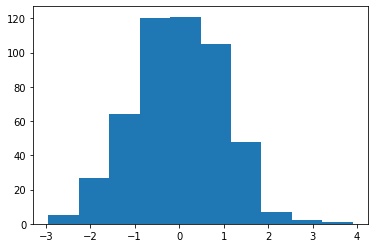

In [34]:
plt.hist(z_group["Age"])

In [37]:
fill_na_mean=lambda x: x.fillna(x.mean())

In [38]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,214.058344,49.408889,11.616681,18624.700131
1,209.384012,93.554116,44.774546,18778.438982
2,137.076390,95.032072,22.096620,19610.104037
3,133.408538,83.937851,48.119355,18192.653535
4,113.437555,72.747826,46.262033,18886.990719
...,...,...,...,...
495,92.585836,79.590973,-1.667166,20130.975248
496,161.761677,42.084812,23.620664,18300.822409
497,146.714433,59.287856,52.645508,20065.983174
498,124.863221,76.914570,35.767382,18246.236607


### Operaciones diversas muy útiles

In [40]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,214.058344,49.408889,11.616681,18624.700131
1,Male,Middle Class,209.384012,93.554116,44.774546,18778.438982
2,Male,Poor,137.076390,95.032072,22.096620,19610.104037
5,Female,Middle Class,174.781112,89.189514,19.756480,21134.350798
6,Female,Poor,187.718494,83.533086,31.217873,19575.002829
15,Female,Rich,164.600309,35.410905,15.271017,19416.761218


In [41]:
double_group.tail(1) #devuelve las utilmas filas

,Gender,Economic Status,Height,Weight,Age,Income
486,Male,Middle Class,177.024962,80.957473,37.597567,20534.116882
493,Male,Poor,169.451709,79.895379,33.875946,20981.462738
494,Female,Middle Class,184.575458,41.073230,27.723275,19079.158662
497,Female,Poor,146.714433,59.287856,52.645508,20065.983174
498,Female,Rich,124.863221,76.914570,35.767382,18246.236607
499,Male,Rich,96.230246,92.281820,28.385808,18835.284159


In [42]:
double_group.nth(32) #devuelve valores especificos 

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     178.012330   37.747607  15.203383  19631.309932
       Poor             154.666671   46.544356  51.610412  20174.993298
       Rich             152.658927  117.550707  23.264769  19199.721450
Male   Middle Class     172.201565   95.620491  18.990461  19667.131588
       Poor             159.574490  105.765684  29.500092  18831.542011
       Rich             156.463296   67.322103  48.594790  20998.431286

In [43]:
double_group.nth(82)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Poor             181.457797   61.065482  26.528167  18930.252706
       Rich             135.613137   42.410567  35.960233  19717.709572
Male   Poor             164.951445  105.944481  46.773706  20594.595440
       Rich             117.129598   63.814539  38.094899  21160.274668

In [44]:
#ordena el data frame (sort) a traves de valores (values) age e income
data_sorted=data.sort_values(["Age", "Income"])

In [45]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
213,Female,Poor,196.954769,94.175811,-2.179862,18249.591354
495,Male,Rich,92.585836,79.590973,-1.667166,20130.975248
174,Male,Middle Class,177.991447,90.038077,-0.017458,20282.426677
310,Female,Middle Class,145.704225,98.705588,1.403420,21262.352644
410,Female,Poor,180.713146,37.209188,2.474862,18297.005172
95,Male,Poor,167.796108,42.673298,2.692581,18157.923639
241,Female,Rich,198.212631,82.622188,3.174268,19934.720485
316,Female,Rich,151.329466,69.522285,3.285895,19424.925022
346,Female,Rich,164.971605,65.273415,3.444435,20008.172370
150,Female,Middle Class,166.052615,101.408053,4.845284,18580.214252


In [46]:
age_grouped=data_sorted.groupby("Gender")

In [49]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
213,Female,Poor,196.954769,94.175811,-2.179862,18249.591354
495,Male,Rich,92.585836,79.590973,-1.667166,20130.975248


In [50]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
242,Female,Poor,137.437195,82.565830,63.564833,20452.500885
358,Male,Rich,193.457712,42.543992,74.347004,21494.393252


### Dividir DataSet: Conjunto de entrenamiento y conjunto de testing 

In [2]:
import pandas as pd

In [ ]:
# training set: Calcula el modelo 80%
# test set: prueba el modelo 20%

In [4]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [5]:
len(data)

3333

### Dividir utilizando la distribución normal

In [7]:
a=np.random.randn(len(data)) #crea datos (vector) aleatorios con la misma longitud de data
#randn significa distribución normal

(array([ 14.,  50., 241., 531., 838., 822., 547., 228.,  51.,  11.]),
 array([-3.33172558, -2.65653442, -1.98134327, -1.30615211, -0.63096095,
         0.0442302 ,  0.71942136,  1.39461252,  2.06980368,  2.74499483,
         3.42018599]),
 <a list of 10 Patch objects>)

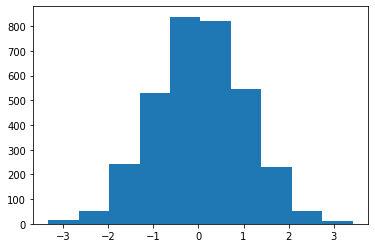

In [10]:
plt.hist(a)

In [18]:
check=(a<0.75)

In [12]:
check

array([ True,  True, False, ...,  True,  True, False])

TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

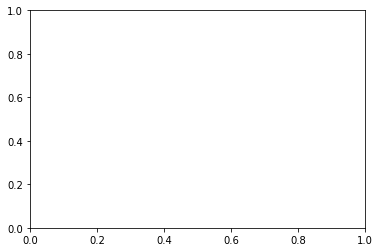

In [19]:
plt.hist(check)

In [15]:
training = data[check] #cumplen la condicion de chek
testing = data[~check] #no cumplen la condición de chek

In [16]:
len(training)

2525

In [17]:
len(testing)

808

### División de datos con la librería sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
train, test= train_test_split(data, test_size=0.2) # definimos de tamaño test 20% y train 80% por defecto

In [25]:
len(train)

2666

In [26]:
len(test)

667

### Utilizando una función shuffle

In [27]:
import numpy as np

In [28]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [29]:
import sklearn

In [31]:
#randonizando
data=sklearn.utils.shuffle(data)

In [32]:
data  # con shuffle lo mezcla aleatoriamente

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
541,RI,150,415,415-8151,no,yes,29,209.9,77,35.68,...,52,13.43,141.9,113,6.39,6.6,1,1.78,0,False.
655,CA,79,510,416-8701,no,no,0,157.6,85,26.79,...,92,16.50,231.5,86,10.42,9.4,10,2.54,5,True.
1726,WV,50,510,358-3114,no,no,0,131.7,108,22.39,...,103,18.40,196.1,126,8.82,11.0,5,2.97,1,False.
815,KY,75,415,341-1191,no,no,0,314.6,102,53.48,...,86,14.43,285.1,100,12.83,5.7,3,1.54,2,True.
3304,IL,71,510,330-7137,yes,no,0,186.1,114,31.64,...,140,16.88,206.5,80,9.29,13.8,5,3.73,4,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,TN,105,408,353-8849,no,no,0,206.2,84,35.05,...,138,21.79,117.1,91,5.27,9.0,3,2.43,1,False.
540,AL,47,408,404-5387,no,yes,28,141.3,94,24.02,...,108,14.28,113.5,84,5.11,7.8,2,2.11,1,False.
1623,ME,130,408,387-6031,no,no,0,176.3,140,29.97,...,104,17.09,161.9,123,7.29,11.3,5,3.05,1,False.
1367,VA,94,415,384-9254,yes,no,0,235.6,131,40.05,...,107,16.56,170.6,93,7.68,8.6,4,2.32,1,False.


In [34]:
cut_id=int(0.75*len(data)) #identificador de corte
train_data=data[:cut_id] # filtra el 75% de los datos, desde el comiezo hasta el  cut_id
test_data=data[cut_id+1:] #toma desde cut_id +1 hasta el final, es decir el resto

In [35]:
len(train_data)

2499

In [36]:
len(test_data)

833